<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Report-Introduction" data-toc-modified-id="Report-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Report Introduction</a></span></li><li><span><a href="#Data-Background" data-toc-modified-id="Data-Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Background</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration and Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphical-Summaries" data-toc-modified-id="Graphical-Summaries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graphical Summaries</a></span><ul class="toc-item"><li><span><a href="#Frequencies" data-toc-modified-id="Frequencies-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Frequencies</a></span></li><li><span><a href="#Location-and-Spread" data-toc-modified-id="Location-and-Spread-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Location and Spread</a></span></li></ul></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cluster Analysis</a></span></li></ul></li><li><span><a href="#Conclusions-and-Data-Quality" data-toc-modified-id="Conclusions-and-Data-Quality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions and Data Quality</a></span><ul class="toc-item"><li><span><a href="#PCA-Analysis" data-toc-modified-id="PCA-Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PCA Analysis</a></span></li></ul></li><li><span><a href="#Conclusions-and-Data-Quality" data-toc-modified-id="Conclusions-and-Data-Quality-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions and Data Quality</a></span></li></ul></div>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_PROCESSED_DATA_DIR = '../data/processed'
"""
str: Base processed data directory
"""

PROCESSED_CSV_FILE = BASE_PROCESSED_DATA_DIR + '/processed.csv'
"""
str: HAM1000_metadata.csv metadata file location 
"""
        
# Read datasets in
    
skin_df = pd.read_csv(PROCESSED_CSV_FILE, index_col=0)

<h1 class="tocSkip"><center class="tocSkip">Data Understanding Report</center></h1>
<h1 class="tocSkip"><center class="tocSkip"><i class="tocSkip">Ammar Hasan 150454388</i></center></h1>

## Report Introduction 

This report documents the Data Understanding stage of the CRISP DM cycle. The Data Understanding
stage involves the process of collecting insights about the data, which are used to help form hypothesis for
later analysis and to form results for deployment to stakeholder. The process involves data descriptions, explorations and quality verification. In this project
this would involve analysing the frequencies, spread, location and patterns of GPU performance through terapixel rendering tasks.

## Data Background 

As stated in the Business Understanding and Data Preparation Stage reports, the data is provided from a kaggle competition in a dataset called the HAM10000. The dataset consists of a set of dermatoscopic images collected from various populations. The final dataset consists of 10015 images. Ground truths are provided by various confirmation techniques (follow-up examination, expert consensus or in-vivo confocal microscopy). The csv files provided consist of files for the metadata and pixel values (RGB and Luminance of 8 X 8 and 28 X 28 sizes).


## Data Description 

The full description of the data is covered in the data preparation stage, but to sum up the following fields from the final dataset are formed after preprocessing: 

* lesion_id (textual): Id field uniquely identifies the skin lesion.
* image_id (textual):  Id field uniquely identifies an image of a given skin lesion. Unique for all tuples in this dataset.
* dx (textual): The diagnosis (ground truth) as a textual code. Values:
    - Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
    - basal cell carcinoma (bcc)
    - benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
    - dermatofibroma (df)
    - melanoma (mel)
    - melanocytic nevi (nv) 
    - vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).-
* dx_type (textual): The method of diagnosis, textual. Values: 
    - histopathology follow-up examination (follow_up)
    - expert consensus (consensus)
    - in-vivo confocal microscopy (confocal). 
* age (numeric): Natural numerical age of the individual the image is taken from 
* sex (textual): Sex of the individual the image is taken from (male, female or 
* localization (textual): Location of skin lesion in individual 
* image_path (textual): Path to raw image of skin lesion 
* pixelXXXX_l_8_8 (numeric): Luminance value of 8 by 8 pixel 
* pixelXXXX_l_28_28 (numeric): Luminance value of 28 by 28 pixel 
* pixelXXXX_rgb_8_8 (numeric): RGB value of 8 by 8 pixel 
* pixelXXXX_rgb_28_28 (numeric): RGB value of 28 by 28 pixel 

In [14]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path,pixel0000_l_8_8,pixel0001_l_8_8,...,pixel2342_rgb_28_28,pixel2343_rgb_28_28,pixel2344_rgb_28_28,pixel2345_rgb_28_28,pixel2346_rgb_28_28,pixel2347_rgb_28_28,pixel2348_rgb_28_28,pixel2349_rgb_28_28,pixel2350_rgb_28_28,pixel2351_rgb_28_28
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0027419.jpg,172,182,...,134,173,124,138,183,147,166,185,154,177
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0025030.jpg,98,149,...,82,60,39,55,25,14,28,25,14,27
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0026769.jpg,165,164,...,149,167,129,143,159,124,142,136,104,117
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0025661.jpg,109,159,...,73,44,26,36,25,12,17,25,12,15
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,data/raw/HAM10000_images_part_2/ISIC_0031633.jpg,173,202,...,201,209,166,185,172,135,149,109,78,92



## Data Exploration and Analysis

This section concentrates on the process of exploring the data for patterns and interesting features using
Exploratory Data Analysis and some unsupervised learning techniques (e.g. PCA Analysis).

### Graphical Summaries 

#### Frequencies 

##### Sex 

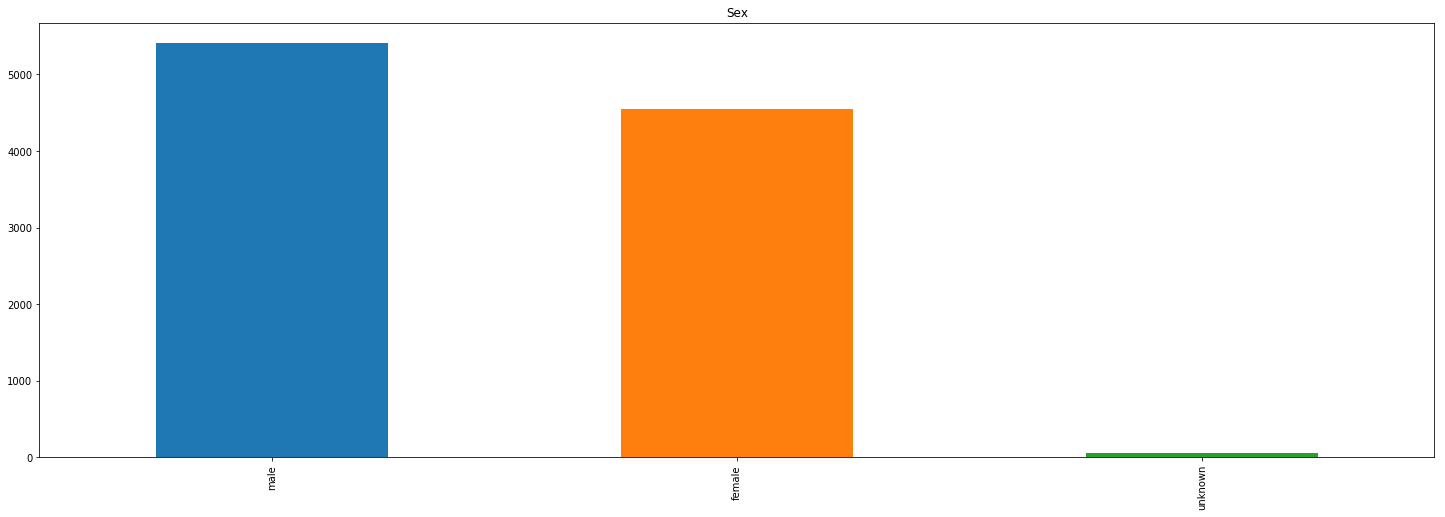

In [16]:
skin_df['sex'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.rcParams['figure.figsize'] = [25, 8]

As can be seen in the frequency bar plot, while not overwhelmingly higher the majority of the sample population are male. Unknown sexes account for a very small percentage of the population sex.

##### Diagnosis 


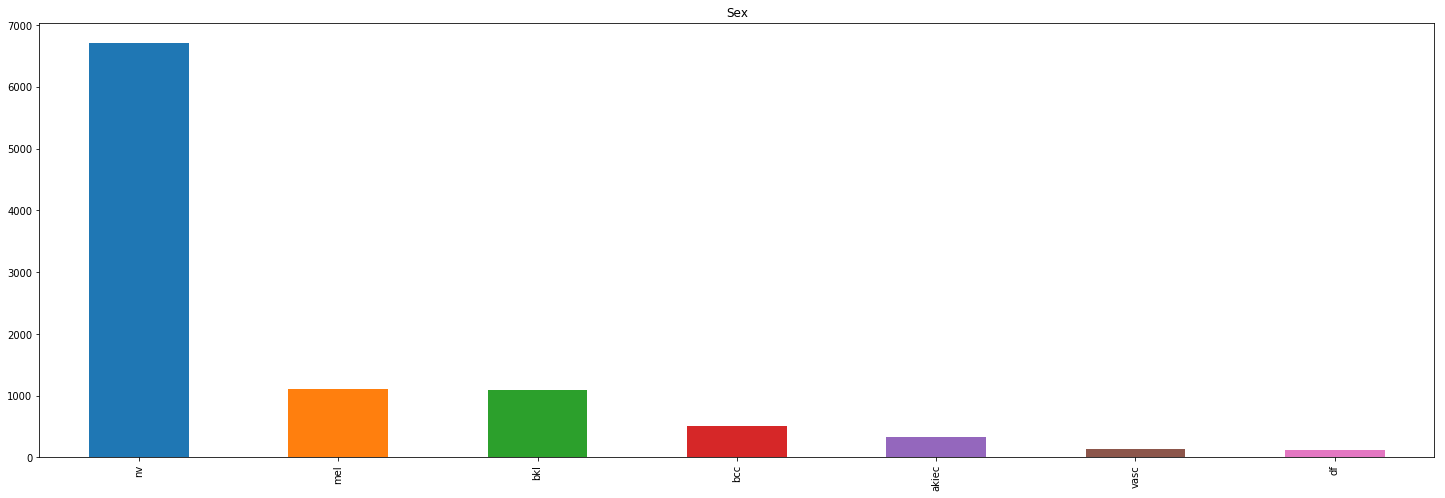

In [15]:
skin_df['dx'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.rcParams['figure.figsize'] = [25, 8]

##### Diagnosis Method

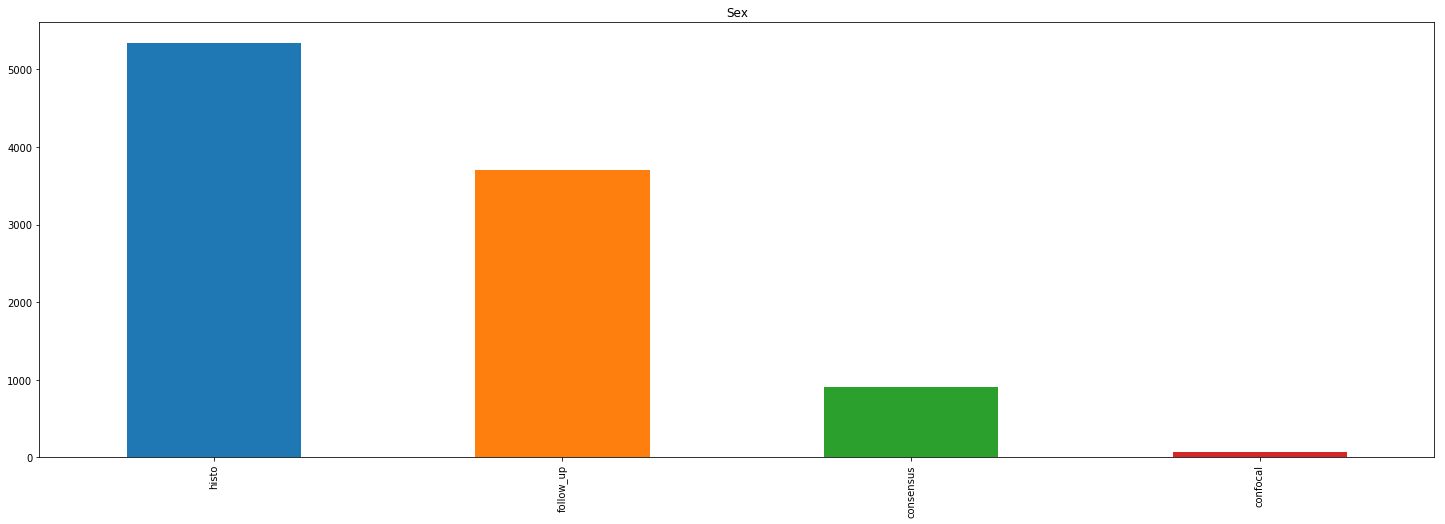

In [17]:
skin_df['dx_type'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.rcParams['figure.figsize'] = [25, 8]

##### Localization 

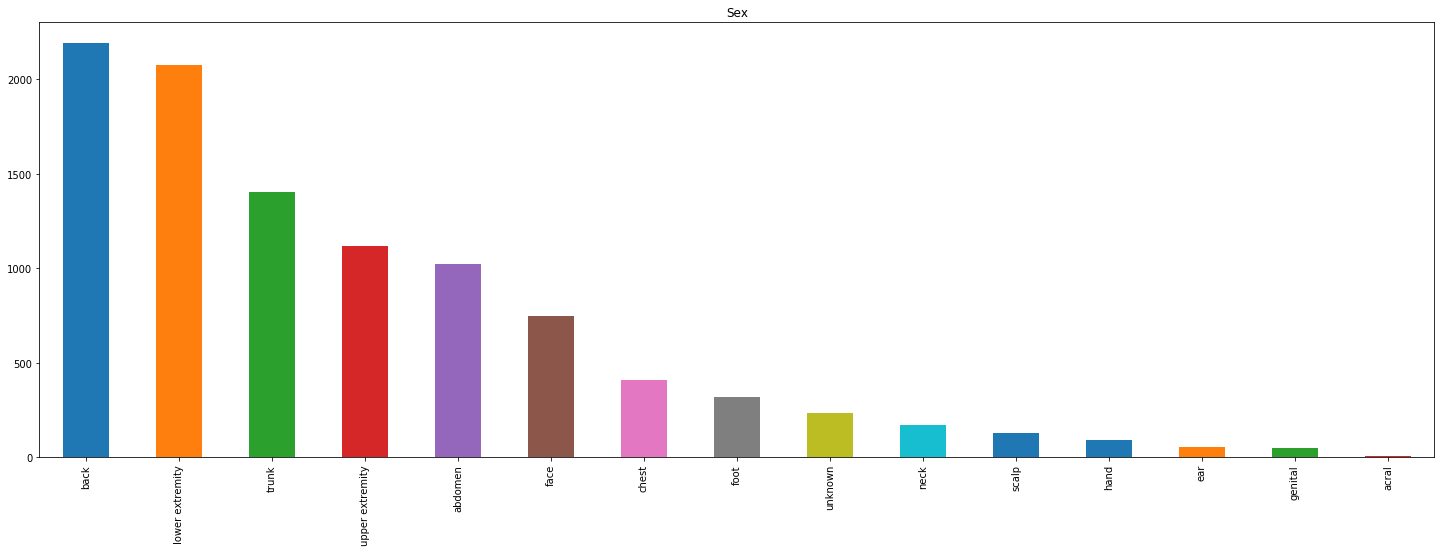

In [18]:
skin_df['localization'].value_counts().plot(kind='bar')
plt.title('Localization')
plt.rcParams['figure.figsize'] = [25, 8]

#### Location and Spread

##### Age


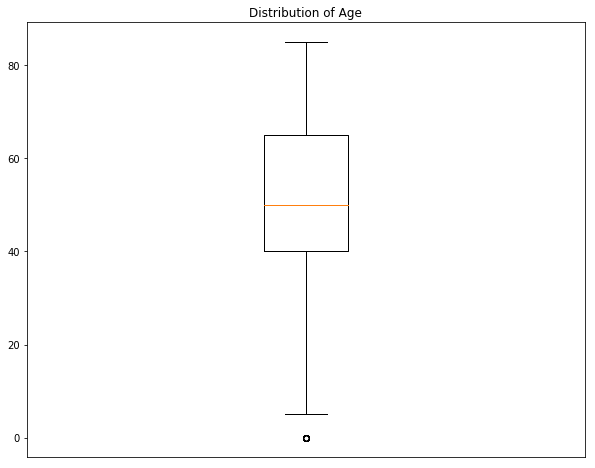

In [24]:
plt.boxplot(skin_df['age'])
plt.title('Distribution of Age')
plt.rcParams['figure.figsize'] = [10, 8]
plt.tick_params(axis='x', which='both',
                bottom=False, top=False, labelbottom=False) 
plt.show()

### PCA Analysis 



## Conclusions and Data Quality 

